# Active Learning Demonstrations - Synthetic Data

The methods of 
* EEM of Zhu, Gharamani and Lafferty
* V-Optimality of Ji and Han
* Sigma-Optimality of Ma, Garnett, and Schneider
adapted to Graph Based Semi-supervised Regression model, instead of Harmonic Functions. (i.e. noisy observations instead of noiseless)

Given observations $\mathbf{y}$ on a subset $\ell \subset Z$ of labeled nodes, the posterior distribution of $\mathbf{u} |\mathbf{y}$ is given by
$$
    \begin{equation*}
        \mathbf{u} | \mathbf{y} \sim \mathcal{N}(\mathbf{m}, C^*)
    \end{equation*}
$$

where $\mathbf{m} = \frac{1}{\gamma^2} C^* H^T\mathbf{y}, C^* = \left( L + \frac{1}{\gamma^2} I \right)^{-1}$.

In [1]:
import sys
sys.path.append('../')
from util.util import *
from datasets.dataloaders import *
from util.al_util import *
%load_ext autoreload

In [139]:
%autoreload

# 2 Moons

Loading the 2 moons data with 2002 total points...
Creating Laplacian
Finished making Laplacian, now calculating the eval/evecs
Converting to dense since computing more than half of eigenvectors...


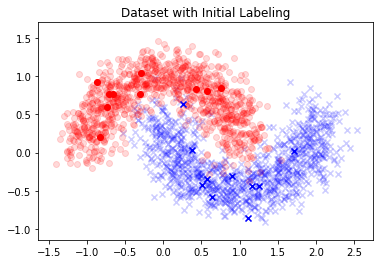

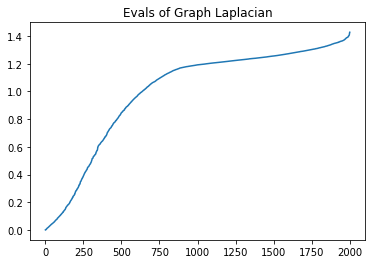

In [48]:
# Setup
N = 2000
moon_data = load_2_moons(N+2, sup_percent=0.01, normed_lap=True,knn=10,sigma=1.)
moon_data.plot_initial()

plt.plot(range(N+2), moon_data.evals)
plt.title("Evals of Graph Laplacian")
plt.show()

Loading the 2 moons data with 2002 total points...
Creating Laplacian
Finished making Laplacian, now calculating the eval/evecs
Converting to dense since computing more than half of eigenvectors...


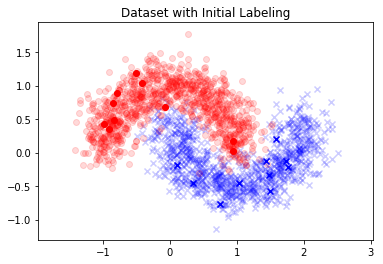

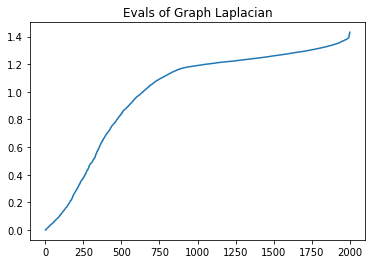

In [104]:
# Setup
N = 2000
moon_data = load_2_moons(N+2, sup_percent=0.01, normed_lap=True,knn=10,sigma=1.)
moon_data.plot_initial()

plt.plot(range(N+2), moon_data.evals)
plt.title("Evals of Graph Laplacian")
plt.show()

In [126]:
# Model Setup
tau, alpha, gamma = .01, 1.0, 0.001
gamma2 = gamma**2.
verbose = True     # set to True if want to see visual of which points chosen
num_iters = 40
batch_size = 5
tag2 = (tau, alpha, gamma2)
test_opts = (batch_size, num_iters, verbose)

True
norm of C= 0.078754
calc_orig_multi took 0.460782 seconds
Iter = 0


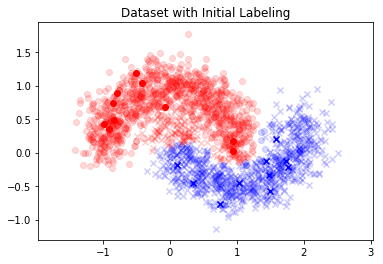

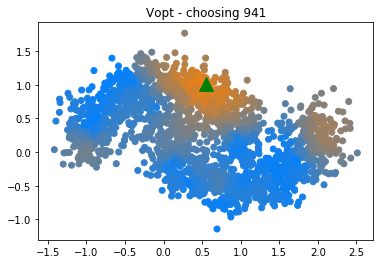

Time for V_opt = 0.393222


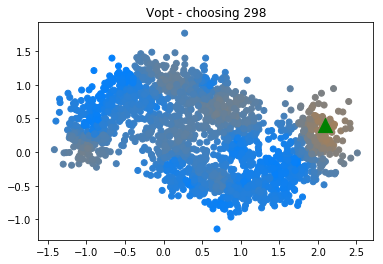

Time for V_opt = 0.394459


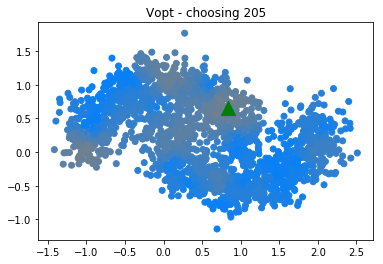

Time for V_opt = 0.391137


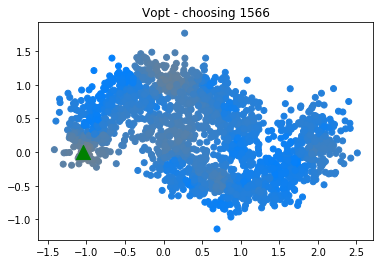

Time for V_opt = 0.413946


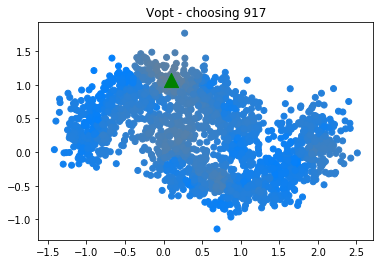

Time for V_opt = 0.382008
True
norm of C= 0.047749
Iter = 1


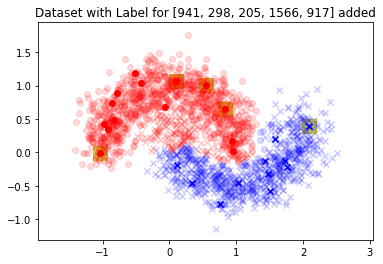

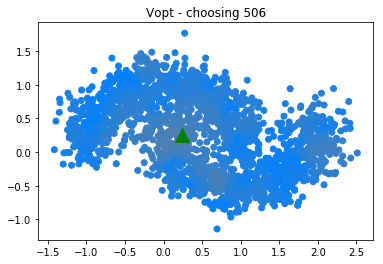

Time for V_opt = 0.398281


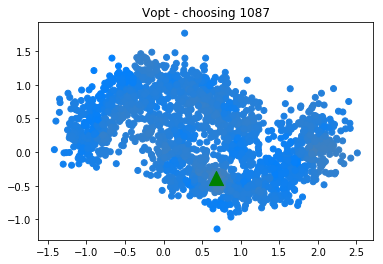

Time for V_opt = 0.381386


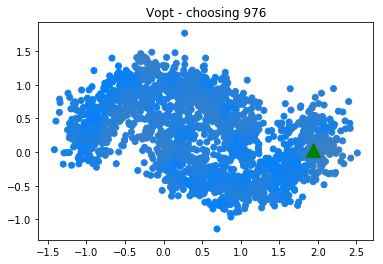

Time for V_opt = 0.396132


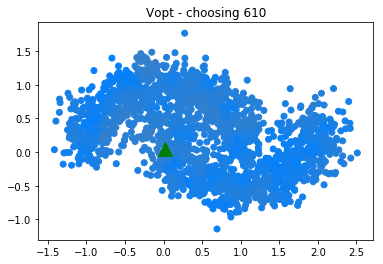

Time for V_opt = 0.398241


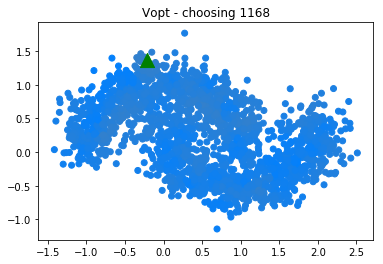

Time for V_opt = 0.428443
True
norm of C= 0.038617
Iter = 2


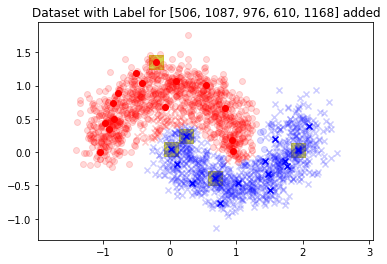

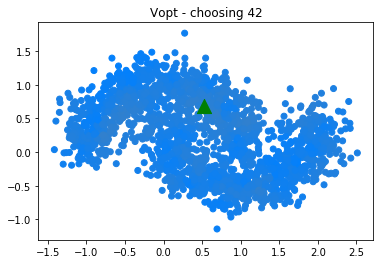

Time for V_opt = 0.387727


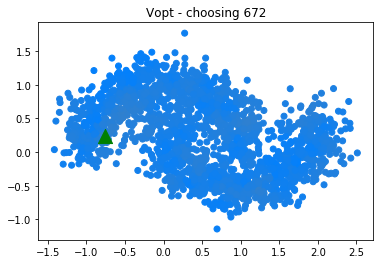

Time for V_opt = 0.407111


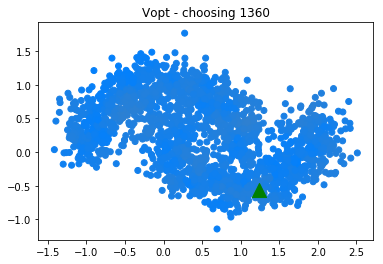

Time for V_opt = 0.398194


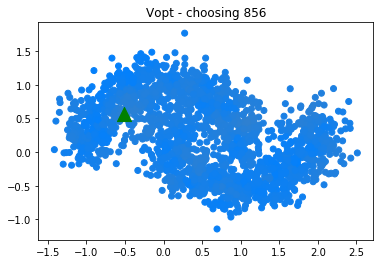

Time for V_opt = 0.383878


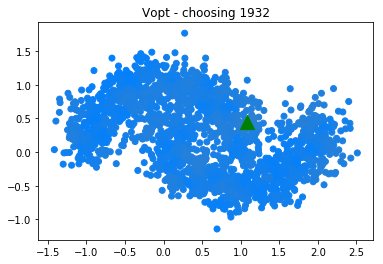

Time for V_opt = 0.393178
True
norm of C= 0.033409
Iter = 3


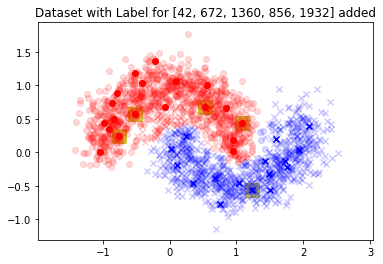

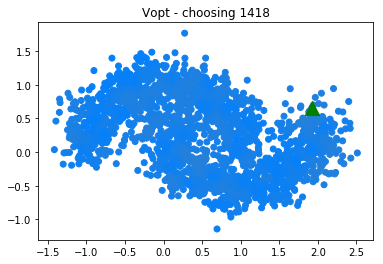

Time for V_opt = 0.398443


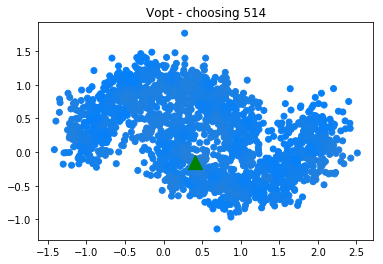

Time for V_opt = 0.403891


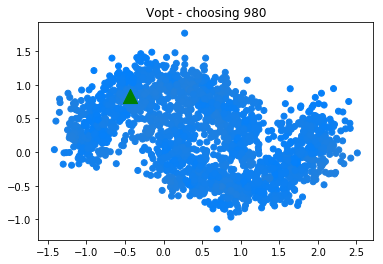

Time for V_opt = 0.395156


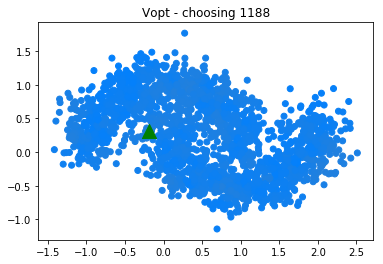

Time for V_opt = 0.399879


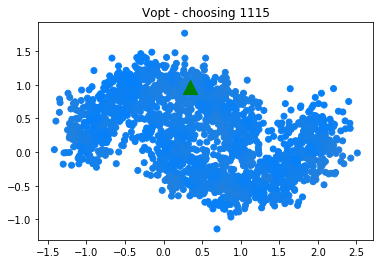

Time for V_opt = 0.405656
True
norm of C= 0.029795
Iter = 4


KeyboardInterrupt: 

In [138]:
# Active Learning Choices  -- V_Opt
fid = copy.deepcopy(moon_data.fid)
method = 'V'
ERRS_V, M_V = run_test_AL_VS_multi(moon_data.X, moon_data.evecs, moon_data.evals, fid, moon_data.ground_truth,
                                   method=method, tag2=tag2, test_opts=test_opts)

if verbose:
    print(ERRS_V)

True
calc_orig_multi took 0.492911 seconds
Iter = 0


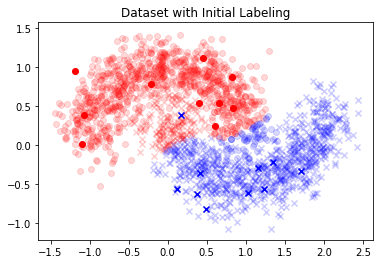

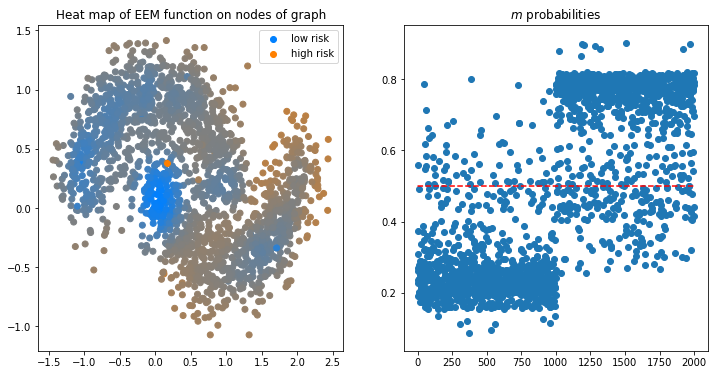

True
Iter = 1


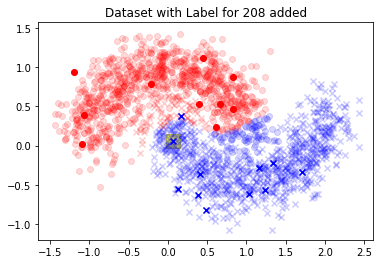

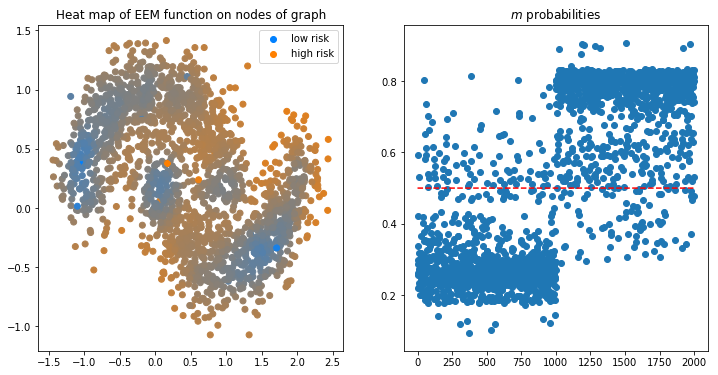

True
Iter = 2


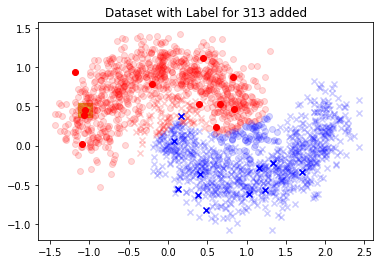

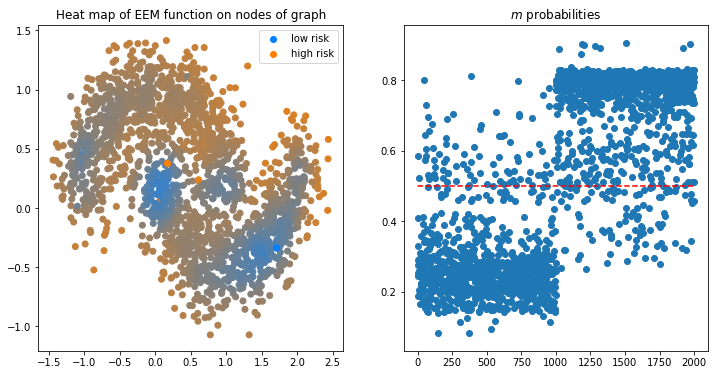

True
Iter = 3


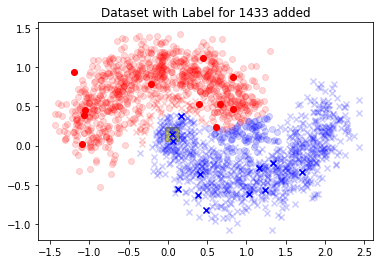

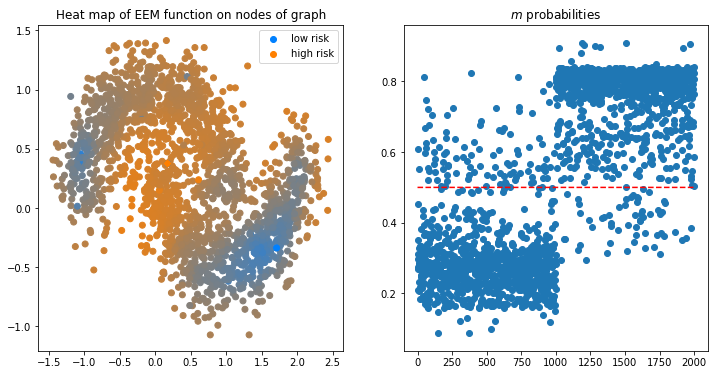

True
Iter = 4


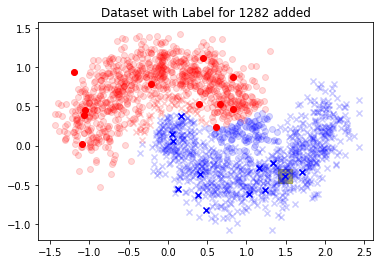

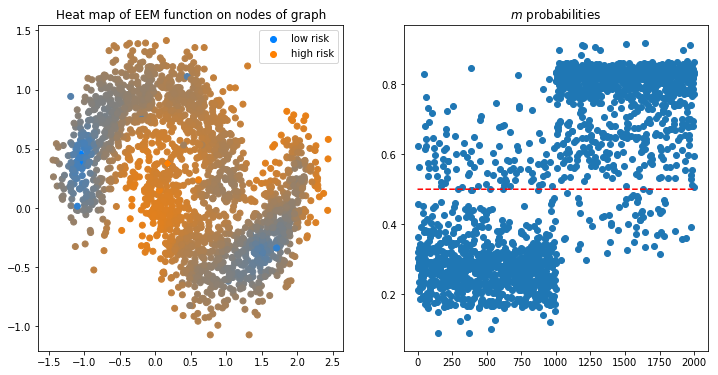

True
Iter = 5


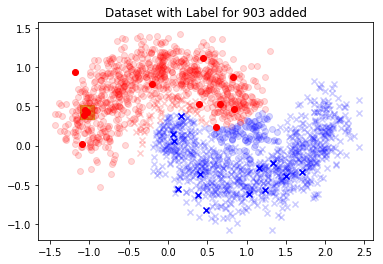

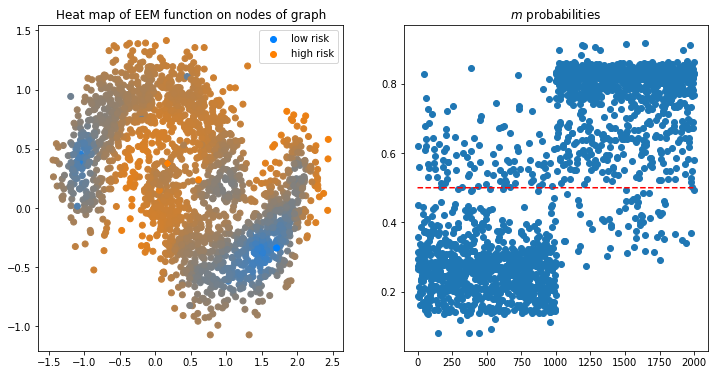

True
Iter = 6


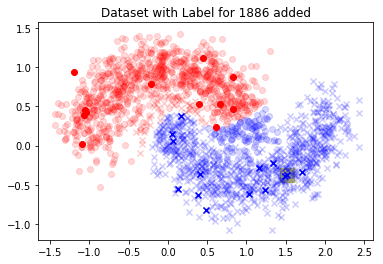

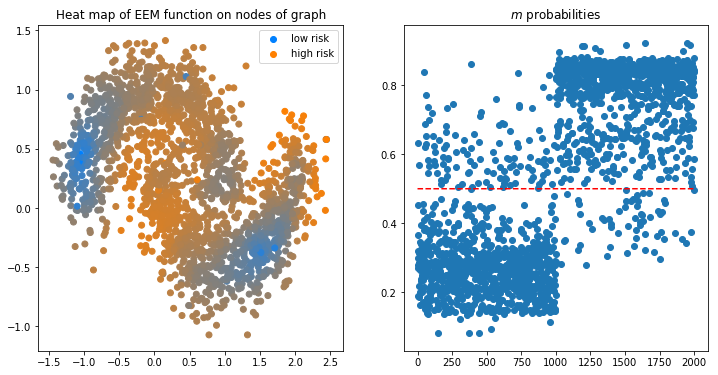

True
Iter = 7


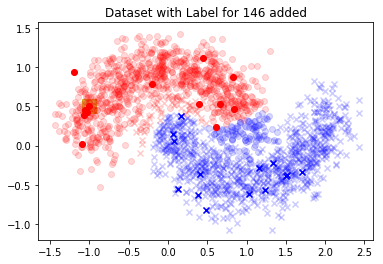

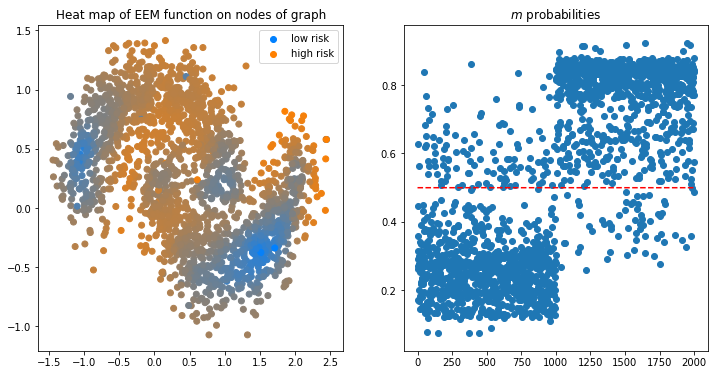

True
Iter = 8


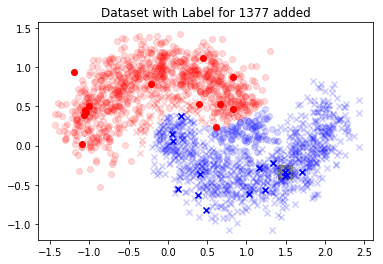

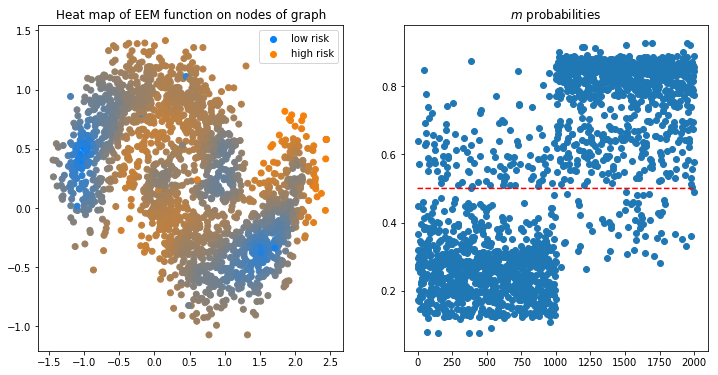

True
Iter = 9


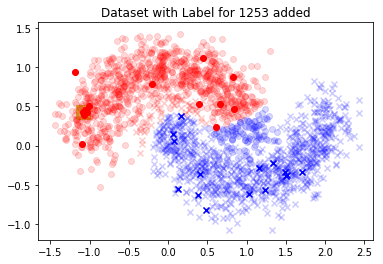

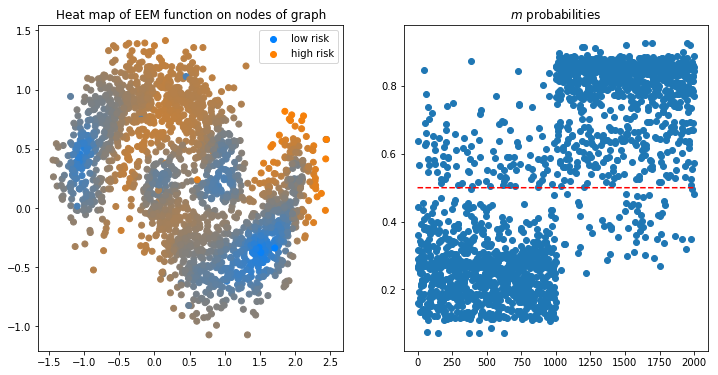

True
Iter = 10


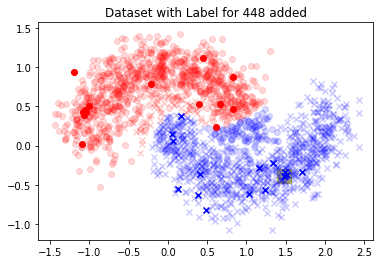

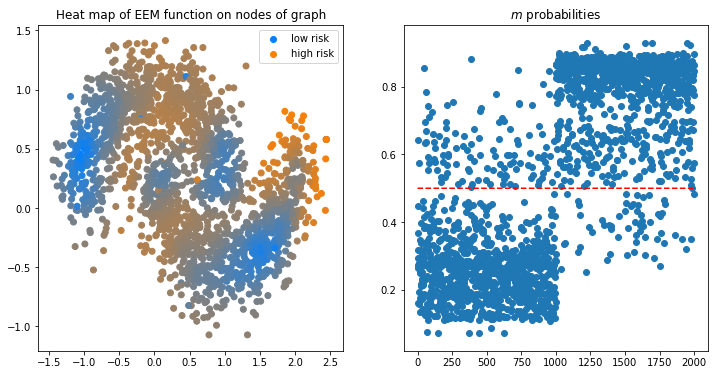

True
Iter = 11


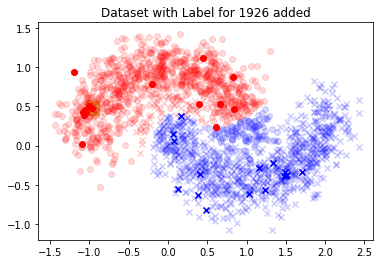

KeyboardInterrupt: 

In [99]:
# Active Learning Choices  -- EEM
fid = copy.deepcopy(moon_data.fid)
ERRS, M = run_test_AL(moon_data.X, moon_data.evecs, moon_data.evals, fid, moon_data.ground_truth, 
                               tag2=tag2, test_opts=(num_iters, verbose))

if verbose:
    print(ERRS)

calc_orig_multi took 0.392206 seconds
Iter = 0


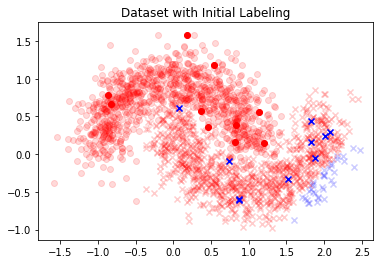

Time for S_opt = 0.040999
Time for S_opt = 0.041466
Time for S_opt = 0.037862
Time for S_opt = 0.034915
Time for S_opt = 0.034550
Iter = 1


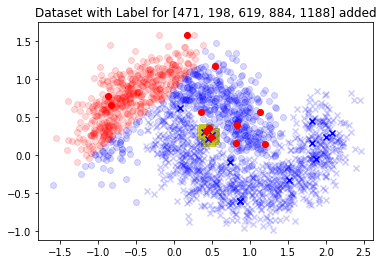

Time for S_opt = 0.035596
Time for S_opt = 0.034402
Time for S_opt = 0.034818
Time for S_opt = 0.035345
Time for S_opt = 0.037622
Iter = 2


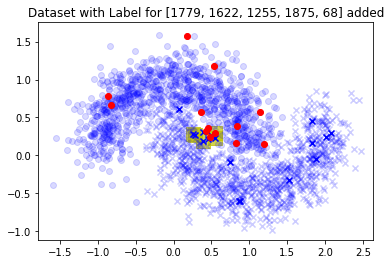

Time for S_opt = 0.054993
Time for S_opt = 0.037775
Time for S_opt = 0.032976
Time for S_opt = 0.032715
Time for S_opt = 0.032900
Iter = 3


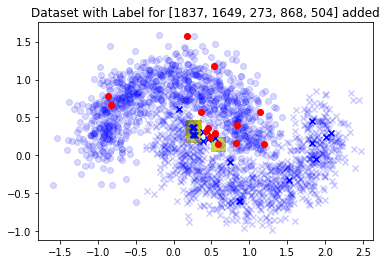

Time for S_opt = 0.036854
Time for S_opt = 0.033040
Time for S_opt = 0.032823
Time for S_opt = 0.033693
Time for S_opt = 0.036121
Iter = 4


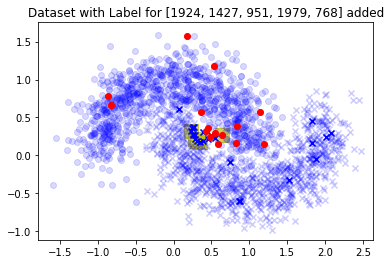

[(-1, 0.477022977022977), ([471, 198, 619, 884, 1188], 0.26173826173826176), ([1779, 1622, 1255, 1875, 68], 0.4935064935064935), ([1837, 1649, 273, 868, 504], 0.493006993006993), ([1924, 1427, 951, 1979, 768], 0.4925074925074925)]


In [47]:
# Active Learning Choices  -- Sigma_Opt
fid = copy.deepcopy(moon_data.fid)
method = 'S'
ERRS_S, M_S = run_test_AL_VS_multi(moon_data.X, moon_data.evecs, moon_data.evals, fid, moon_data.ground_truth, 
                                   method='S', tag2=tag2, test_opts=test_opts)

if verbose:
    print(ERRS_S)

In [119]:
# Random choices
fid = copy.deepcopy(moon_data.fid)
show_all_iters = True
ERRS_rand, M_rand = run_test_rand_multi(moon_data.X, moon_data.evecs, moon_data.evals, fid, moon_data.ground_truth, 
                                        tag2=tag2, test_opts=(num_iters, False), show_all_iters=show_all_iters)
if verbose:
    print(ERRS_rand)

True
[(-1, 0.07442557442557443), (1489, 0.07442557442557443), (1311, 0.07392607392607392), (131, 0.07442557442557443), (1994, 0.08141858141858142), (697, 0.08141858141858142), (1392, 0.08091908091908091), (1175, 0.08141858141858142), (768, 0.08141858141858142), (33, 0.08141858141858142), (896, 0.08191808191808192), (688, 0.060939060939060936), (897, 0.060939060939060936), (326, 0.05944055944055944), (1312, 0.058941058941058944), (1137, 0.06243756243756244), (482, 0.06243756243756244), (1587, 0.06243756243756244), (1092, 0.06243756243756244), (1712, 0.060939060939060936), (1485, 0.06293706293706294), (527, 0.06293706293706294), (155, 0.06343656343656344), (1379, 0.06343656343656344), (948, 0.06443556443556443), (1960, 0.06593406593406594), (966, 0.06593406593406594), (761, 0.06593406593406594), (931, 0.06593406593406594), (506, 0.041458541458541456), (388, 0.04195804195804196), (1629, 0.039460539460539464), (1976, 0.039460539460539464), (1138, 0.039460539460539464), (998, 0.036963036963

## Error Plotting - 2 Moons 

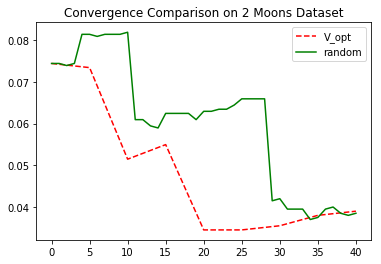

In [121]:
colors = ['y', 'r', 'k', 'g']
#ids, errs =zip(*ERRS)
#ids_s, errs_s = zip(*ERRS_S)
ids_v, errs_v = zip(*ERRS_V)
ids_rand, errs_rand = zip(*ERRS_rand)
num_batches = int(num_iters / batch_size)
plt.figure()
#plt.plot([i*batch_size for i in range(num_batches+1)], errs_s, 'k--', label='S_opt')
plt.plot([i*batch_size for i in range(num_batches+1)], errs_v, 'r--', label='V_opt')
if show_all_iters:
    plt.plot([i for i in range(num_iters+1)], errs_rand, 'g', label='random')
else:
    plt.plot([0,num_iters], errs_rand, 'g', label='random')
#plt.plot([i for i in range(num_iters+1)], errs, 'b--', label='EEM')
plt.legend()
plt.title('Convergence Comparison on 2 Moons Dataset')
plt.show()

# 2 Gaussian Clusters

In [ ]:
# Problem Setup --- Need to rework this example to be more general. I've made it so that the clusters are 
# in consecutive order for plotting m (0-99, 100-199). For this I had to re write the helper functions when 
# doing the Two moons dataset.

Ns = [200,200]
N = sum(Ns)
means = [np.array([1.0,0.]), np.array([-1.0,0.])]
Covs = [0.3*np.eye(2), 0.3*np.eye(2)]

g2_data = load_gaussian_cluster(Ns, means, Covs, normed_lap=True)

# Model Setup
tau, alpha, gamma = 0.1, 1.0, 0.01
gamma2 = gamma**2.
verbose = True     # set to True if want to see visual of which points chosen
num_iters = 10
batch_size = 5
tag2 = (tau, alpha, gamma2)

In [ ]:
# Active Learning - Sigma optimal multiclass
fid = copy.deepcopy(g2_data.fid)
method = 'S'
test_opts = (batch_size, num_iters, verbose)
ERRS_S, M_S = run_test_AL_VS_multi(g2_data.X, g2_data.evecs, g2_data.evals, fid, g2_data.ground_truth, 
                                   method, tag2, test_opts)

if verbose:
    print(ERRS_S)

In [ ]:
g2_data.fid[-1] = g2_data.fid[0]
del g2_data.fid[0]
g2_data.ground_truth[g2_data.ground_truth == 0] = -1

In [ ]:
# Active Learning - EEM binary class
fid = copy.deepcopy(g2_data.fid)
test_opts = (num_iters, verbose)
ERRS, M = run_test_AL(g2_data.X, g2_data.evecs, g2_data.evals, fid, g2_data.ground_truth, 
                        tag2, test_opts)

if verbose:
    print(ERRS)

# Gaussian Clusters Example - 3 clusters

Note now we don't calculate the EEM method for choosing queries because we haven't generalized the 0-1 risk calculation of Zhu et al for the multiclass case. So in the multiclass case we are just showing V and $\Sigma$ optimality choices.

In [ ]:
# Problem Setup --- Need to rework this example to be more general. I've made it so that the clusters are 
# in consecutive order for plotting m (0-99, 100-199). For this I had to re write the helper functions when 
# doing the Two moons dataset.

Ns = [50,50,50]
N = sum(Ns)
fs = 5
means = [np.array([1.0,0.]), np.array([-1.0,0.]), np.array([0.,1.0])]
Covs = [0.15*np.eye(2), 0.15*np.eye(2), 0.15*np.eye(2)]
data = load_gaussian_cluster(Ns, means, Covs)
data.plot_initial()

In [ ]:
# Model Setup
tau, alpha, gamma = 0.1, 1.0, 0.001
gamma2 = gamma**2.
tag2 = (tau, alpha, gamma2)
verbose = False     # set to True if want to see visual of which points chosen
num_iters = 20
batch_size = 5



In [ ]:
# Active Learning - Sigma optimal multiclass
fid = copy.deepcopy(data.fid)
method = 'S'
test_opts = (batch_size, num_iters, verbose)
ERRS_S, M_S = run_test_AL_VS_multi(data.X, data.evecs, data.evals, fid, data.ground_truth, method, tag2, test_opts)

if verbose:
    print(ERRS_S)

# Active Learning - V optimal multiclass
fid = copy.deepcopy(data.fid)
method = 'V'
test_opts = (batch_size, num_iters, verbose)
ERRS_V, M_V = run_test_AL_VS_multi(data.X, data.evecs, data.evals, fid, data.ground_truth, method, tag2, test_opts)

if verbose:
    print(ERRS_V)

fid = copy.deepcopy(data.fid)
tag2 = (tau, alpha, gamma2)
test_opts = (num_iters, False)
show_all_iters = True
ERRS_rand, M_rand = run_test_rand_multi(data.X, data.evecs, data.evals, fid, data.ground_truth, tag2, 
                                        test_opts, show_all_iters=show_all_iters)

if verbose:
    print(ERRS_rand)

## Convergence Comparison

In [ ]:
num_batches = int(num_iters/batch_size)
ids_s, errs_s = zip(*ERRS_S)
ids_v, errs_v = zip(*ERRS_V)
ids_rand, errs_rand = zip(*ERRS_rand)
plt.figure()
plt.plot([i*batch_size for i in range(num_batches+1)], errs_s, 'b--', label='S_opt')
plt.plot([i*batch_size for i in range(num_batches+1)], errs_v, 'r--', label='V_opt')
if show_all_iters:
    plt.plot([i for i in range(num_iters+1)], errs_rand, 'g', label='random')
else:
    plt.plot([0,num_iters], errs_rand, 'g', label='random')
plt.title('Convergence Comparison on 3 Gaussian Cluster')
plt.legend()